# New Section

references:

*   https://geopandas.org/en/stable/getting_started/introduction.html
*   https://pyrosm.readthedocs.io/en/latest/basics.html



important information:


*   PBF is a recommended osm file extension mainly because it requires little memory size
*   List item



In [ ]:
!pip install pyrosm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.1 MB 47.6 MB/s 
     |████████████████████████████████| 1.0 MB 39.4 MB/s 
     |████████████████████████████████| 1.6 MB 60.1 MB/s 
  Using cached cykhash-2.0.0-cp37-cp37m-linux_x86_64.whl
  Using cached pyrobuf-0.9.3-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 16.7 MB 48.5 MB/s 
     |████████████████████████████████| 6.3 MB 30.5 MB/s 
  Created wheel for pyrosm: filename=pyrosm-0.6.1-cp37-cp37m-linux_x86_64.whl size=5430536 sha256=41acc4b8effbf28062b73515c8764456c3976595fd3f7d98b0e480cf81df1f0f
  Stored in directory: /root/.cache/pip/wheels/e8/9e/d8/e424ffc5eaa71ccb122bb79d92ef75802c49b9b0a9366d6da4
Successfully built pyrosm


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import the library
import pyrosm

# Print information about the basic usage of the `OSM` reader object
help(pyrosm.OSM.__init__)

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Help on function __init__ in module pyrosm.pyrosm:

__init__(self, filepath, bounding_box=None)
    Initialize self.  See help(type(self)) for accurate signature.



In [ ]:
from pyrosm.data import sources

# Print available source categories
sources.available['subregions']['germany']

['arnsberg_regbez',
 'baden_wuerttemberg',
 'bayern',
 'berlin',
 'brandenburg',
 'bremen',
 'detmold_regbez',
 'duesseldorf_regbez',
 'freiburg_regbez',
 'hamburg',
 'hessen',
 'karlsruhe_regbez',
 'koeln_regbez',
 'mecklenburg_vorpommern',
 'mittelfranken',
 'muenster_regbez',
 'niederbayern',
 'niedersachsen',
 'nordrhein_westfalen',
 'oberbayern',
 'oberfranken',
 'oberpfalz',
 'rheinland_pfalz',
 'saarland',
 'sachsen',
 'sachsen_anhalt',
 'schleswig_holstein',
 'schwaben',
 'stuttgart_regbez',
 'thueringen',
 'tuebingen_regbez',
 'unterfranken']

#4

In [ ]:

# read data from Geofabrik
area_of_interest='detmold_regbez'#Frieder, please replace 'saarland' with 'nordrhein_westfalen'
#tuebingen_regbez
fp = pyrosm.get_data(area_of_interest)
print("Filepath to test data:", fp)

# Initialize the OSM object 
osm = pyrosm.OSM(fp)

# See the type
print("Type of 'osm' instance: ", type(osm))

Downloaded Protobuf data 'detmold-regbez-latest.osm.pbf' (107.55 MB) to:
'/tmp/pyrosm/detmold-regbez-latest.osm.pbf'
Filepath to test data: /tmp/pyrosm/detmold-regbez-latest.osm.pbf
Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


# read buildings

In [ ]:
#the session crashed when using NRW,Baden Wurttemberg, Hessen, rheinland_pfalz
#colab uses 12 GB RAM
buildings = osm.get_buildings()


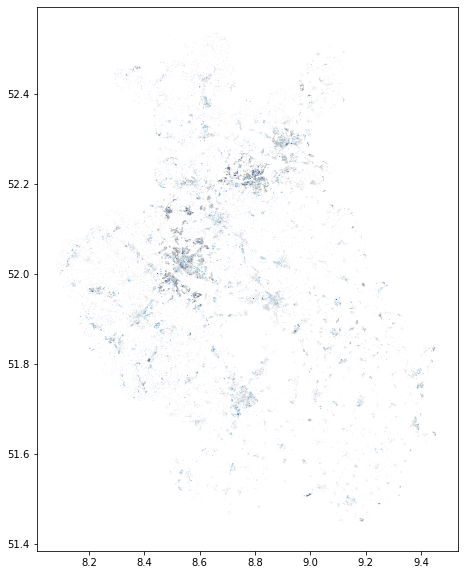

In [ ]:
buildings.plot(figsize=(10,10))
#xaxis=longitude, yaxis=latitude

In [ ]:
buildings.head()

,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,Bielefeld,DE,None,26,None,33609,None,Am Stadtholz,None,None,...,None,None,None,5037736,1644485463,24,None,way,"POLYGON ((8.55469 52.02813, 8.55475 52.02812, ...",NaN
1,Bielefeld,DE,None,50,None,33604,None,Teutoburger Straße,None,None,...,None,None,None,5044976,1624737503,39,"{""building:colour"":""#e0d4c3"",""roof:colour"":""#b...",way,"POLYGON ((8.54438 52.01467, 8.54420 52.01443, ...",NaN
2,None,None,None,None,None,None,None,None,None,Parkhaus 1,...,None,None,None,5740621,1637154217,24,"{""access"":""yes"",""building:levels:underground"":...",way,"POLYGON ((8.49836 52.03853, 8.49794 52.03869, ...",NaN
3,None,None,None,None,None,None,None,None,None,Parkhaus 3,...,None,None,None,5740624,1637154217,23,"{""access"":""yes"",""building:levels:underground"":...",way,"POLYGON ((8.49558 52.03880, 8.49563 52.03884, ...",NaN
4,None,None,None,None,None,None,None,None,None,Parkhaus 2,...,None,None,None,5740626,1637154217,23,"{""access"":""yes"",""building:levels:underground"":...",way,"POLYGON ((8.49598 52.03865, 8.49608 52.03861, ...",NaN


In [ ]:
buildings.tail()

,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
1105050,None,None,NaN,None,None,None,None,None,None,None,...,None,None,None,34372346367,1652134722,1,"{""type"":""multipolygon""}",relation,"POLYGON ((8.39680 51.91117, 8.39679 51.91130, ...",0.0
1105051,Werther (Westf.),DE,NaN,6,None,33824,None,Rodderheide,None,Weber Metallbau,...,None,None,None,34838654382,1652450484,1,"{""type"":""multipolygon""}",relation,"POLYGON ((8.42608 52.08149, 8.42710 52.08178, ...",0.0
1105052,None,None,NaN,None,None,None,None,None,None,Hauptpost Bünde,...,None,None,None,35276900317,1652552850,1,"{""type"":""multipolygon"",""wheelchair"":""yes""}",relation,"POLYGON ((8.58396 52.20093, 8.58395 52.20095, ...",0.0
1105053,Bad Driburg,DE,NaN,24,None,33014,None,Georg-Nave-Straße,None,Driburg Therme,...,None,None,None,36224894687,1653039028,2,"{""bath:indoor"":""yes"",""bath:open_air"":""yes"",""ba...",relation,"MULTIPOLYGON (((9.02671 51.74271, 9.02677 51.7...",0.0
1105054,None,None,NaN,None,None,None,None,None,None,None,...,None,None,None,38396546436,1654885122,1,"{""leisure"":""stadium"",""roof"":""no"",""type"":""multi...",relation,"POLYGON ((8.34958 52.06350, 8.34952 52.06357, ...",0.0


In [ ]:
buildings.shape

(1105055, 42)

In [ ]:
buildings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1105055 entries, 0 to 1105054
Data columns (total 42 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   addr:city           517165 non-null   object  
 1   addr:country        433459 non-null   object  
 2   addr:full           2 non-null        object  
 3   addr:housenumber    518280 non-null   object  
 4   addr:housename      771 non-null      object  
 5   addr:postcode       515058 non-null   object  
 6   addr:place          429 non-null      object  
 7   addr:street         519004 non-null   object  
 8   email               424 non-null      object  
 9   name                13077 non-null    object  
 10  opening_hours       1475 non-null     object  
 11  operator            2475 non-null     object  
 12  phone               1460 non-null     object  
 13  ref                 1130 non-null     object  
 14  url                 62 non-null       obje

In [ ]:
buildings.columns

Index(['addr:city', 'addr:country', 'addr:full', 'addr:housenumber',
       'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email',
       'name', 'opening_hours', 'operator', 'phone', 'ref', 'url', 'website',
       'building', 'amenity', 'building:flats', 'building:levels',
       'building:material', 'building:max_level', 'building:min_level',
       'building:fireproof', 'building:use', 'craft', 'height',
       'internet_access', 'landuse', 'levels', 'office', 'shop', 'source',
       'start_date', 'wikipedia', 'id', 'timestamp', 'version', 'tags',
       'osm_type', 'geometry', 'changeset'],
      dtype='object')

In [ ]:
print('columns without similar values:\n')
for col in buildings.columns:
  if len(buildings[col].unique())==len(buildings):
    print(col)

columns without similar values:

id
geometry


**every building has an identity: id&geometry**

In [ ]:
import operator

nan_per_column={col:len(buildings.loc[(buildings[col].isnull()) | (buildings[col].isna())])/len(buildings)*100 for col in buildings.columns}
sorted(nan_per_column.items(), key=operator.itemgetter(1))
#nan_per_column

[('building', 0.0),
 ('id', 0.0),
 ('timestamp', 0.0),
 ('version', 0.0),
 ('osm_type', 0.0),
 ('geometry', 0.0),
 ('addr:street', 53.03364990882806),
 ('addr:housenumber', 53.09916700978684),
 ('addr:city', 53.200066964992686),
 ('addr:postcode', 53.39073620770007),
 ('addr:country', 60.77489355733425),
 ('tags', 84.39036971010493),
 ('source', 94.19440661324549),
 ('building:levels', 94.89057105754917),
 ('name', 98.81661998724044),
 ('building:material', 99.00403147354656),
 ('height', 99.4709765577279),
 ('amenity', 99.48084032016507),
 ('website', 99.73195904276257),
 ('operator', 99.77602924741302),
 ('shop', 99.82724841749958),
 ('opening_hours', 99.8665224807815),
 ('phone', 99.86787987928203),
 ('ref', 99.89774264629362),
 ('start_date', 99.89873807186068),
 ('wikipedia', 99.91855608996836),
 ('addr:housename', 99.9302297170729),
 ('building:flats', 99.9566537412165),
 ('changeset', 99.9578301532503),
 ('addr:place', 99.96117840288493),
 ('email', 99.96163086905176),
 ('office

# columns without missing values

In [ ]:
buildings.building

0                 yes
1            hospital
2             parking
3             parking
4             parking
              ...    
1105050        office
1105051    industrial
1105052           yes
1105053           yes
1105054           yes
Name: building, Length: 1105055, dtype: object

In [ ]:
buildings['building'].unique()

array(['yes', 'hospital', 'parking', 'retail', 'commercial', 'school',
       'civic', 'public', 'farm', 'supermarket', 'sports_hall', 'house',
       'sports_centre', 'train_station', 'roof', 'chapel', 'church',
       'industrial', 'kindergarten', 'service', 'warehouse',
       'manufacture', 'theatre', 'fire_station', 'hotel', 'apartments',
       'residential', 'office', 'detached', 'garage', 'cowshed',
       'farm_auxiliary', 'university', 'greenhouse', 'community_centre',
       'hangar', 'transportation', 'garages', 'carport', 'barn',
       'dormitory', 'ruins', 'shed', 'hut', 'casino', 'government',
       'auditorium', 'sty', 'riding_hall', 'terrace', 'college',
       'semidetached_house', 'pavilion', 'monastery', 'parish_hall',
       'transformer_tower', 'construction', 'bridge', 'boathouse',
       'police', 'public_building', 'hall', 'cabin', 'stable',
       'slurry_tank', 'digester', 'prefabricated', 'agricultural',
       'signal_box', 'toilets', 'sedimentation_tank'

In [ ]:
len(buildings.timestamp.unique())

238944

In [ ]:
buildings.version.unique()

array([24, 39, 23, 22, 21, 11, 10,  4,  5,  6, 29, 31, 19, 28, 13, 18,  3,
       14,  7,  9,  2, 16, 15,  8, 20, 12,  1, 17, 25, 36, 26, 35, 27, 32,
       34, 30, 41], dtype=int8)

**"version" of a building? what does it mean?**

In [ ]:
buildings.osm_type.unique()

array(['way', 'relation'], dtype=object)

# interesting columns with missing values

In [ ]:
buildings['addr:street'].unique()

array(['Am Stadtholz', 'Teutoburger Straße', None, ..., 'Aluminiumstraße',
       'Gerhard-Lüking-Straße', 'Brenken Garten'], dtype=object)

In [ ]:
#number of streets that exist in Detmold dataset
len(buildings['addr:street'].unique())

18521

In [ ]:
buildings['addr:city'].unique()

array(['Bielefeld', None, 'Bad Oeynhausen', 'Paderborn',
       'Werther (Westf.)', 'Herford', 'Schlangen', 'Bad Salzuflen',
       'Gütersloh', 'Rietberg', 'Lichtenau', 'Lemgo', 'Delbrück',
       'Minden', 'Beverungen', 'Preußisch Oldendorf', 'Lage', 'Löhne',
       'Altenbeken', 'Espelkamp', 'Schloß Holte-Stukenbrock', 'Bünde',
       'Stemwede', 'Detmold', 'Enger', 'Oerlinghausen', 'Hiddenhausen',
       'Rheda-Wiedenbrück', 'Verl', 'Petershagen', 'Hüllhorst',
       'Bad Driburg', 'Willebadessen', 'Spenge', 'Hövelhof',
       'Rödinghausen', 'Warburg', 'Halle (Westf.)', 'Steinhagen',
       'Borgholzhausen', 'Herzebrock-Clarholz', 'Leopoldshöhe',
       'Schieder-Schwalenberg', 'Blomberg', 'Lügde', 'Brakel',
       'Steinheim', 'Horn-Bad Meinberg', 'Marienmünster', 'Extertal',
       'Langenberg', 'Bad Pyrmont', 'Rinteln', 'Kalletal', 'Barntrup',
       'Dörentrup', 'Lübbecke', 'Harsewinkel', 'Kirchlengern', 'Höxter',
       'Hille', 'Bad Lippspringe', 'Marienfeld', 'Porta Westfal

In [ ]:
buildings['addr:postcode'].unique()

array(['33609', '33604', None, '32547', '33100', '33613', '33824',
       '32052', '33602', '33607', '33189', '32108', '33689', '33334',
       '33397', '33332', '33330', '32051', '33165', '32657', '33129',
       '32049', '32425', '33102', '33647', '37688', '32361', '32791',
       '32584', '33184', '32105', '32339', '33605', '33615', '33758',
       '32257', '32351', '33739', '32760', '32130', '33813', '33611',
       '32120', '33378', '32758', '33415', '32469', '32609', '33014',
       '34439', '32139', '33161', '32289', '34414', '33649', '32107',
       '33790', '33803', '33699', '33829', '33442', '33818', '33719',
       '32545', '33659', '33617', '32816', '32825', '33729', '32676',
       '33034', '32839', '32805', '32423', '37696', '32699', '33619',
       '33449', '31812', '31737', '32689', '32683', '32694', '32312',
       '32756', '33428', '32278', '37671', '33104', '33098', '32479',
       '32549', '33175', '32427', '32429', '32457', '33181', '33106',
       '33142', '32602'

In [ ]:
buildings['addr:country'].unique()

array(['DE', None], dtype=object)

In [ ]:
len(buildings['tags'].unique())

13989

In [ ]:
buildings['tags'].unique()

array([None,
       '{"building:colour":"#e0d4c3","roof:colour":"#ba9a7e","roof:shape":"flat","wheelchair":"yes"}',
       '{"access":"yes","building:levels:underground":"1","fee":"no","level":"-1;1","parking":"multi-storey","wheelchair":"no"}',
       ...,
       '{"access":"employees","parking":"multi-storey","type":"multipolygon"}',
       '{"bath:indoor":"yes","bath:open_air":"yes","bath:type":"thermal","fee":"yes","type":"multipolygon"}',
       '{"leisure":"stadium","roof":"no","type":"multipolygon"}'],
      dtype=object)

In [ ]:
#count the # of available house numbers per building type 
count_available_house_numbers=buildings.groupby(by='building').count()['addr:housenumber'].reset_index()
count_available_house_numbers.rename(columns={'addr:housenumber':'number_of_available_house_numbers'},inplace=True)


In [ ]:
#count the total number of houses per builing type
count_available_house_numbers['number_of_houses']=""
for i in range(len(count_available_house_numbers)):
  count_available_house_numbers['number_of_houses'].iloc[i]=len(buildings.loc[buildings['building']==count_available_house_numbers.building.iloc[i]])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [ ]:
count_available_house_numbers

,building,number_of_available_house_numbers,number_of_houses
0,E,1,1
1,Orangerie,1,1
2,Spenge,4,4
3,Studentenwohnheim,2,2
4,abandoned,0,1
...,...,...,...
158,water_tower,0,1
159,wayside_chapel,0,2
160,wayside_shrine,1,27
161,yes,378443,857326


In [ ]:
#verify that the # of unique building types is 163 
buildings.building.nunique()
#done

163

In [ ]:
def count_occurence_building_type(building_type):
  return len(buildings.loc[buildings.building==building_type])

#example
count_occurence_building_type('yes')

857326

In [ ]:
#build a new column
count_available_house_numbers['percentage_available_values']=""

In [ ]:
#computes the % of available house numbers per building type
for i in range(len(count_available_house_numbers)):
  count_available_house_numbers['percentage_available_values'].iloc[i]=count_available_house_numbers['number_of_available_house_numbers'].iloc[i]/count_available_house_numbers['number_of_houses'].iloc[i]*100


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
count_available_house_numbers

,building,number_of_available_house_numbers,number_of_houses,percentage_available_values
0,E,1,1,100.0
1,Orangerie,1,1,100.0
2,Spenge,4,4,100.0
3,Studentenwohnheim,2,2,100.0
4,abandoned,0,1,0.0
...,...,...,...,...
158,water_tower,0,1,0.0
159,wayside_chapel,0,2,0.0
160,wayside_shrine,1,27,3.703704
161,yes,378443,857326,44.142252


In [ ]:
#verify that the total number of available house numbers is the same in both datasets
count_available_house_numbers['number_of_available_house_numbers'].sum()==count_available_house_numbers['number_of_houses'].sum()-buildings['addr:housenumber'].isna().sum()

True

In [ ]:
count_available_house_numbers = count_available_house_numbers.astype({'number_of_available_house_numbers':'int',
                                                                      'number_of_houses':'int',
                                                                      'percentage_available_values':'float'})

In [ ]:
count_available_house_numbers.percentage_available_values.describe()

count    163.000000
mean      36.404933
std       40.929385
min        0.000000
25%        0.000000
50%       11.111111
75%       80.000000
max      100.000000
Name: percentage_available_values, dtype: float64

In [ ]:
count_available_house_numbers.loc[count_available_house_numbers.percentage_available_values==100]
#interesting: shopping center, telecom

,building,number_of_available_house_numbers,number_of_houses,percentage_available_values
0,E,1,1,100.0
1,Orangerie,1,1,100.0
2,Spenge,4,4,100.0
3,Studentenwohnheim,2,2,100.0
20,casino,1,1,100.0
21,castle,2,2,100.0
22,cathedral,1,1,100.0
31,community,1,1,100.0
40,destroyed,1,1,100.0
65,hall,1,1,100.0


In [ ]:
# % above the 3rd quartile
count_available_house_numbers.loc[count_available_house_numbers.percentage_available_values>80]
#interesting: apartments, detached, house, residential, semi detached house, terrace

,building,number_of_available_house_numbers,number_of_houses,percentage_available_values
0,E,1,1,100.000000
1,Orangerie,1,1,100.000000
2,Spenge,4,4,100.000000
3,Studentenwohnheim,2,2,100.000000
7,apartments,13696,14672,93.347874
20,casino,1,1,100.000000
21,castle,2,2,100.000000
22,cathedral,1,1,100.000000
29,college,20,24,83.333333
31,community,1,1,100.000000


In [ ]:
#